In [56]:
import torch
from torch_geometric.data import Data
import os

data, _ = torch.load(r"dataset/ogbn_mag/processed/geometric_data_processed.pt")


paper_data = data
print(paper_data)

/tmp/ipykernel_57904/603408139.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data, _ = torch.load(r"dataset/ogbn_mag/processed/geometric_data_processed.pt")


Data(
  num_nodes_dict={
    author=1134649,
    field_of_study=59965,
    institution=8740,
    paper=736389,
  },
  edge_index_dict={
    (author, affiliated_with, institution)=[2, 1043998],
    (author, writes, paper)=[2, 7145660],
    (paper, cites, paper)=[2, 5416271],
    (paper, has_topic, field_of_study)=[2, 7505078],
  },
  x_dict={ paper=[736389, 128] },
  node_year={ paper=[736389, 1] },
  edge_reltype={
    (author, affiliated_with, institution)=[1043998, 1],
    (author, writes, paper)=[7145660, 1],
    (paper, cites, paper)=[5416271, 1],
    (paper, has_topic, field_of_study)=[7505078, 1],
  },
  y_dict={ paper=[736389, 1] }
)


In [67]:
import torch
import random
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset
data, _ = torch.load(r"dataset/ogbn_mag/processed/geometric_data_processed.pt")

# Step 1: Sample 10 papers
num_papers = data['paper'].num_nodes
sampled_paper_indices = random.sample(range(num_papers), 10)

# Step 2: Extract citation edges involving the sampled papers
citation_edge_index = data.edge_index_dict[('paper', 'cites', 'paper')]  # Get all citation edges

# Filter citation edges to include only those involving the sampled papers
sampled_paper_set = set(sampled_paper_indices)
citation_edges = []
for src, dst in citation_edge_index.t().tolist():
    if src in sampled_paper_set and dst in sampled_paper_set:
        citation_edges.append((src, dst))

# Step 3: Create a graph using networkx
G = nx.DiGraph()  # Use a directed graph since citations are directional

# Add nodes (sampled papers)
G.add_nodes_from(sampled_paper_indices)

# Add edges (citations between sampled papers)
G.add_edges_from(citation_edges)

# Step 4: Plot the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Layout for positioning nodes
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray', arrows=True)
plt.title("Bipartite Graph of Sampled Papers and Citations")
plt.show()

/tmp/ipykernel_57904/2891669803.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data, _ = torch.load(r"dataset/ogbn_mag/processed/geometric_data_processed.pt")


KeyError: 'paper'

/tmp/ipykernel_57904/3891826600.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data, _ = torch.load(r"dataset/ogbn_mag/processed/geometric_data_processed.pt")


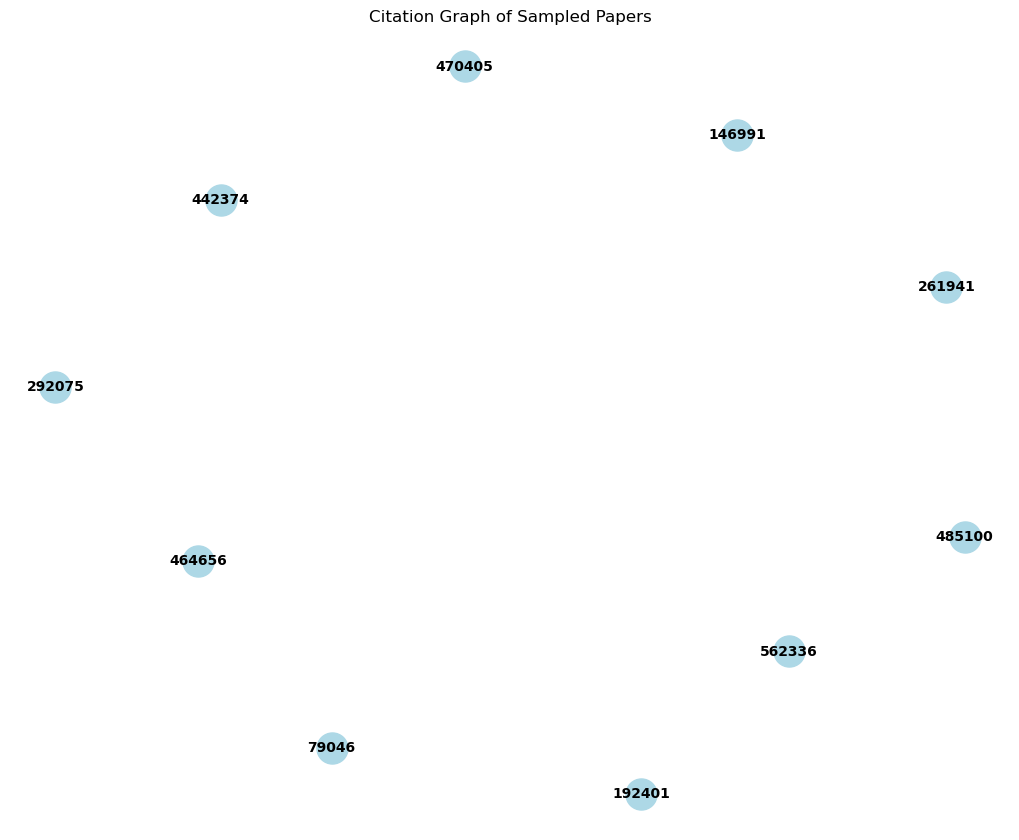

In [68]:
import torch
import random
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset
data, _ = torch.load(r"dataset/ogbn_mag/processed/geometric_data_processed.pt")

# Step 1: Sample 10 papers
num_papers = data.num_nodes_dict['paper']  # Total number of papers
sampled_paper_indices = random.sample(range(num_papers), 10)  # Randomly sample 10 papers

# Step 2: Extract citation edges involving the sampled papers
citation_edge_index = data.edge_index_dict[('paper', 'cites', 'paper')]  # Get all citation edges

# Filter citation edges to include only those involving the sampled papers
sampled_paper_set = set(sampled_paper_indices)
citation_edges = []
for src, dst in citation_edge_index.t().tolist():
    if src in sampled_paper_set and dst in sampled_paper_set:
        citation_edges.append((src, dst))

# Step 3: Create a graph using networkx
G = nx.DiGraph()  # Use a directed graph since citations are directional

# Add nodes (sampled papers)
G.add_nodes_from(sampled_paper_indices)

# Add edges (citations between sampled papers)
G.add_edges_from(citation_edges)

# Step 4: Plot the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Layout for positioning nodes
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray', arrows=True)
plt.title("Citation Graph of Sampled Papers")
plt.show()

/tmp/ipykernel_23187/4172009918.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data, _ = torch.load(r"/home/william/Documents/DTU/GraphML_Bachelorprojekt/dataset/ogbn_m

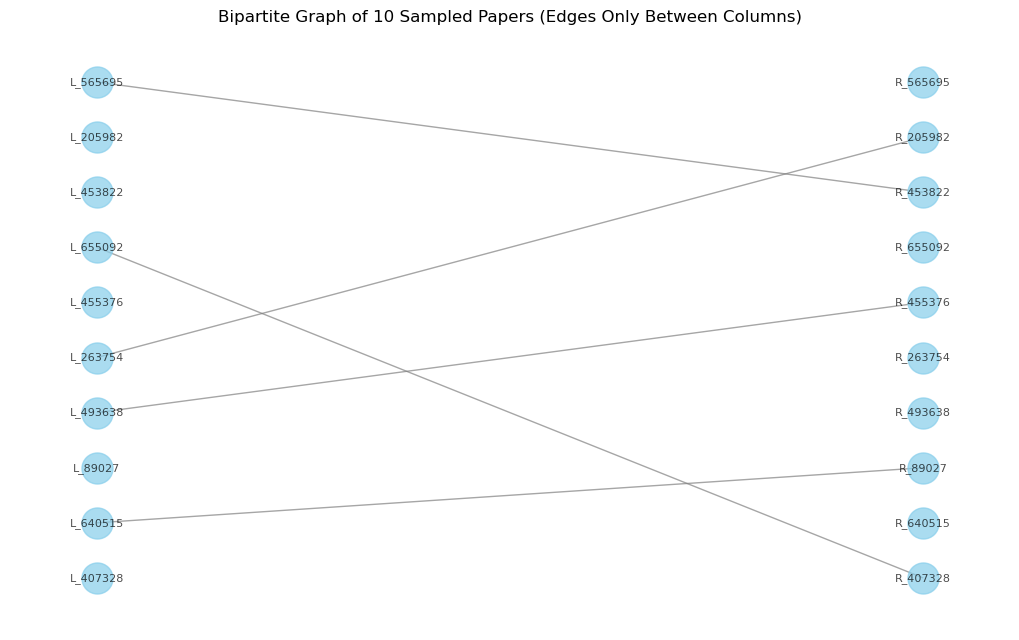

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import torch
import random

# Load the data
data, _ = torch.load(r"/home/william/Documents/DTU/GraphML_Bachelorprojekt/dataset/ogbn_mag/processed/geometric_data_processed.pt")

# Extract the citation edges
paper_cites_edge_index = data.edge_index_dict[('paper', 'cites', 'paper')]
paper_cites_source = paper_cites_edge_index[0].numpy()
paper_cites_target = paper_cites_edge_index[1].numpy()

# Create a dictionary of citations {source: [list of targets]}
citation_dict = {}
for src, tgt in zip(paper_cites_source, paper_cites_target):
    if src not in citation_dict:
        citation_dict[src] = []
    citation_dict[src].append(tgt)

# Sample 10 papers that actually have citation links
num_samples = 5
valid_paper_pairs = [(src, tgt) for src, tgt in zip(paper_cites_source, paper_cites_target) if src != tgt]

# Randomly sample 10 citation relationships
sampled_pairs = random.sample(valid_paper_pairs, num_samples)

# Extract unique paper IDs from sampled pairs
sampled_papers = set()
for src, tgt in sampled_pairs:
    sampled_papers.add(src)
    sampled_papers.add(tgt)

# Create a bipartite graph
B = nx.Graph()

# Create separate nodes for left and right
left_nodes = {p: f"L_{p}" for p in sampled_papers}  # Left-side nodes
right_nodes = {p: f"R_{p}" for p in sampled_papers}  # Right-side nodes

B.add_nodes_from(left_nodes.values(), bipartite=0)  # Left column
B.add_nodes_from(right_nodes.values(), bipartite=1)  # Right column

# Add edges between left and right based on sampled citation relationships
for src, tgt in sampled_pairs:
    B.add_edge(left_nodes[src], right_nodes[tgt])  # Edge only between columns

# Create layout
pos = {}
for i, paper in enumerate(sampled_papers):
    pos[left_nodes[paper]] = (0, i)  # Left column (x=0)
    pos[right_nodes[paper]] = (1, i)  # Right column (x=1)

# Draw the bipartite graph
plt.figure(figsize=(10, 6))
nx.draw(B, pos, with_labels=True, node_size=500, edge_color='gray', node_color='skyblue', alpha=0.7, font_size=8)
plt.title("Bipartite Graph of 10 Sampled Papers (Edges Only Between Columns)")
plt.show()
